In [1]:
import pandas as pd

# Step 1: Load the datasets
climate_file_path = 'Singapore_weather_data_2002-2023.csv'
dengue_file_path = 'Singapore_weeklycases_2002-2022.csv'

daily_climate_data = pd.read_csv(climate_file_path)
weekly_cases_data = pd.read_csv(dengue_file_path)

In [2]:
daily_climate_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2003-01-01,27.1,23.0,32.0,1.8,NaN,NaN,3.1,NaN,NaN,NaN
1,2003-01-02,27.3,25.0,32.0,18.3,NaN,NaN,4.9,NaN,NaN,NaN
2,2003-01-03,26.6,24.2,29.9,2.5,NaN,359.0,5.5,NaN,NaN,NaN
3,2003-01-04,25.7,24.0,29.0,4.1,NaN,NaN,5.4,NaN,NaN,NaN
4,2003-01-05,26.6,24.4,31.0,26.4,NaN,350.0,9.0,NaN,NaN,NaN


In [3]:
weekly_cases_data.head()

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,S_res,T_res,UUID
0,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2001-12-30,2002-01-05,2001,20,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02
1,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-01,2002-12-31,2002,3945,Total,Admin0,Year,TYCHO-ALL-19242017-SV_DF01-00
2,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-06,2002-01-12,2002,22,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02
3,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-13,2002-01-19,2002,22,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02
4,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-20,2002-01-26,2002,18,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02


In [4]:
# Step 2: Prepare the climate data
# Convert the 'date' column to datetime format
daily_climate_data['date'] = pd.to_datetime(daily_climate_data['date'])

# Add columns for 'week_number' and 'year' using the 'date' column
daily_climate_data['week_number'] = daily_climate_data['date'].dt.isocalendar().week
daily_climate_data['year'] = daily_climate_data['date'].dt.year

# Aggregate the daily data into weekly data using mean for numerical columns
weekly_climate_data = (
    daily_climate_data.groupby(['year', 'week_number'])
    .mean(numeric_only=True)
    .reset_index()
)

In [5]:
weekly_climate_data.head()

,year,week_number,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2003,1,26.950000,24.262500,30.987500,7.337500,NaN,148.6,8.075000,NaN,1012.866667,NaN
1,2003,2,26.400000,24.057143,29.883333,9.542857,NaN,277.2,6.283333,NaN,NaN,NaN
2,2003,3,26.883333,24.400000,30.133333,17.266667,NaN,182.0,11.840000,NaN,NaN,NaN
3,2003,4,27.214286,24.457143,31.285714,1.828571,NaN,13.0,8.985714,NaN,NaN,NaN
4,2003,5,26.371429,24.285714,29.071429,31.957143,NaN,86.0,9.985714,NaN,NaN,NaN


In [6]:
# Step 3: Prepare the dengue data
# Convert the 'calendar_start_date' column to datetime format
weekly_cases_data['calendar_start_date'] = pd.to_datetime(weekly_cases_data['calendar_start_date'])

# Add 'week_number' and 'Year' columns derived from 'calendar_start_date'
weekly_cases_data['week_number'] = weekly_cases_data['calendar_start_date'].dt.isocalendar().week
weekly_cases_data['Year'] = weekly_cases_data['calendar_start_date'].dt.year

# Filter out rows where T_res is not 'Week'
weekly_cases_data = weekly_cases_data[weekly_cases_data['T_res'] == 'Week']

In [7]:
weekly_cases_data.head()

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,S_res,T_res,UUID,week_number
0,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2001-12-30,2002-01-05,2001,20,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02,52
2,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-06,2002-01-12,2002,22,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02,1
3,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-13,2002-01-19,2002,22,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02,2
4,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-20,2002-01-26,2002,18,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02,3
5,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2002-01-27,2002-02-02,2002,19,Confirmed,Admin0,Week,MOH-SGP-20002011-Y01-02,4


In [8]:
# Step 4: Merge the datasets
merged_data = pd.merge(
    weekly_cases_data,
    weekly_climate_data,
    left_on=['Year', 'week_number'],
    right_on=['year', 'week_number'],
    how='inner'
)

In [9]:
merged_data.head()

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2003-01-05,2003-01-11,...,26.950000,24.262500,30.987500,7.337500,NaN,148.6,8.075000,NaN,1012.866667,NaN
1,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2003-01-12,2003-01-18,...,26.400000,24.057143,29.883333,9.542857,NaN,277.2,6.283333,NaN,NaN,NaN
2,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2003-01-19,2003-01-25,...,26.883333,24.400000,30.133333,17.266667,NaN,182.0,11.840000,NaN,NaN,NaN
3,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2003-01-26,2003-02-01,...,27.214286,24.457143,31.285714,1.828571,NaN,13.0,8.985714,NaN,NaN,NaN
4,SINGAPORE,NaN,NaN,SINGAPORE,SGP,222,SGP,NaN,2003-02-02,2003-02-08,...,26.371429,24.285714,29.071429,31.957143,NaN,86.0,9.985714,NaN,NaN,NaN


In [10]:
# Step 5: Save or display the merged dataset
merged_data.to_csv('merged_weekly_dengue_climate_data.csv', index=False)
print("Merged data has been saved to 'merged_weekly_dengue_climate_data.csv'.")

Merged data has been saved to 'merged_weekly_dengue_climate_data.csv'.


In [11]:
# Create lagged features for climate data
merged_data['tavg_lag1'] = merged_data['tavg'].shift(1)
merged_data['tavg_lag2'] = merged_data['tavg'].shift(2)

merged_data['prcp_lag1'] = merged_data['prcp'].shift(1)
merged_data['prcp_lag2'] = merged_data['prcp'].shift(2)

# Drop rows with NaN values caused by shifting (if required)
merged_data = merged_data.dropna(subset=['tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2'])

# Save the updated dataset to a CSV file
merged_data.to_csv("dataset_with_lagged_features.csv", index=False)
print("The updated dataset with lagged features has been saved as 'dataset_with_lagged_features.csv'.")

# Alternatively, display the first few rows
print(merged_data.head())

The updated dataset with lagged features has been saved as 'dataset_with_lagged_features.csv'.
  adm_0_name  adm_1_name  adm_2_name  full_name ISO_A0  FAO_GAUL_code  \
2  SINGAPORE         NaN         NaN  SINGAPORE    SGP            222   
3  SINGAPORE         NaN         NaN  SINGAPORE    SGP            222   
4  SINGAPORE         NaN         NaN  SINGAPORE    SGP            222   
5  SINGAPORE         NaN         NaN  SINGAPORE    SGP            222   
6  SINGAPORE         NaN         NaN  SINGAPORE    SGP            222   

  RNE_iso_code  IBGE_code calendar_start_date calendar_end_date  ...  snow  \
2          SGP        NaN          2003-01-19        2003-01-25  ...   NaN   
3          SGP        NaN          2003-01-26        2003-02-01  ...   NaN   
4          SGP        NaN          2003-02-02        2003-02-08  ...   NaN   
5          SGP        NaN          2003-02-09        2003-02-15  ...   NaN   
6          SGP        NaN          2003-02-16        2003-02-22  ...   NaN  

In [12]:
# Display the column names
print(merged_data.columns.tolist())

['adm_0_name', 'adm_1_name', 'adm_2_name', 'full_name', 'ISO_A0', 'FAO_GAUL_code', 'RNE_iso_code', 'IBGE_code', 'calendar_start_date', 'calendar_end_date', 'Year', 'dengue_total', 'case_definition_standardised', 'S_res', 'T_res', 'UUID', 'week_number', 'year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']


In [13]:
# Select only the columns needed for analysis
columns_needed = [
    'dengue_total',       # Target variable
    'Year',               # Temporal feature
    'week_number',        # Temporal feature
    'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres',  # Climate features
    'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2'       # Lagged features
]

# Create a new DataFrame with the selected columns
analysis_data = merged_data[columns_needed]

# Save the new dataset to a CSV file (optional)
analysis_data.to_csv("analysis_dataset.csv", index=False)

# Display the first few rows of the dataset
print(analysis_data.head())

   dengue_total  Year  week_number       tavg       tmin       tmax  \
2            84  2003            3  26.883333  24.400000  30.133333   
3            89  2003            4  27.214286  24.457143  31.285714   
4            62  2003            5  26.371429  24.285714  29.071429   
5            88  2003            6  26.428571  23.600000  29.914286   
6            88  2003            7  27.342857  25.314286  30.685714   

        prcp        wdir       wspd  pres  tavg_lag1  tavg_lag2  prcp_lag1  \
2  17.266667  182.000000  11.840000   NaN  26.400000  26.950000   9.542857   
3   1.828571   13.000000   8.985714   NaN  26.883333  26.400000  17.266667   
4  31.957143   86.000000   9.985714   NaN  27.214286  26.883333   1.828571   
5   4.514286  235.833333  10.942857   NaN  26.371429  27.214286  31.957143   
6   6.171429   19.800000   9.357143   NaN  26.428571  26.371429   4.514286   

   prcp_lag2  
2   7.337500  
3   9.542857  
4  17.266667  
5   1.828571  
6  31.957143  


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Define High/Low Dengue Risk
threshold = analysis_data['dengue_total'].median()
analysis_data['dengue_risk'] = np.where(analysis_data['dengue_total'] > threshold, 1, 0)

# Step 2: Select Features and Target
features = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_risk'

# Drop rows with missing values in the selected features
analysis_data = analysis_data.dropna(subset=features + [target])

X = analysis_data[features]
y = analysis_data[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression Classifier
log_model = LogisticRegression(random_state=42, max_iter=500)
log_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = log_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Get coefficients to interpret the model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:\n", coefficients)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54        38
           1       0.62      0.64      0.63        45

    accuracy                           0.59        83
   macro avg       0.59      0.59      0.59        83
weighted avg       0.59      0.59      0.59        83

Confusion Matrix:
 [[20 18]
 [16 29]]

Feature Coefficients:
      Feature  Coefficient
0       tavg     0.980839
6  tavg_lag2     0.150507
8  prcp_lag2    -0.023801
7  prcp_lag1    -0.031329
5  tavg_lag1    -0.040731
3       prcp    -0.067113
4       wspd    -0.079743
1       tmin    -0.402183
2       tmax    -0.813525


<ipython-input-14-bec83077a9b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['dengue_risk'] = np.where(analysis_data['dengue_total'] > threshold, 1, 0)


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.58      0.53        38
           1       0.58      0.49      0.53        45

    accuracy                           0.53        83
   macro avg       0.53      0.53      0.53        83
weighted avg       0.54      0.53      0.53        83

Confusion Matrix:
 [[22 16]
 [23 22]]

Feature Importances:
      Feature  Importance
2       tmax    0.121119
3       prcp    0.116722
7  prcp_lag1    0.116072
4       wspd    0.114781
8  prcp_lag2    0.109181
0       tavg    0.106396
5  tavg_lag1    0.106290
1       tmin    0.105652
6  tavg_lag2    0.103788


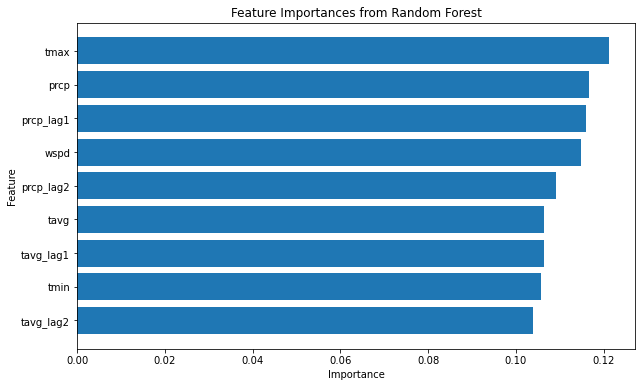

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Define High/Low Dengue Risk
threshold = analysis_data['dengue_total'].median()
analysis_data['dengue_risk'] = np.where(analysis_data['dengue_total'] > threshold, 1, 0)

# Step 2: Select Features and Target
features = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_risk'

# Drop rows with missing values in the selected features
analysis_data = analysis_data.dropna(subset=features + [target])

X = analysis_data[features]
y = analysis_data[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Optional: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Linear Regression Results:
Mean Absolute Error (MAE): 65.79
Root Mean Squared Error (RMSE): 97.69
R² Score: -0.02

Random Forest Regression Results:
Mean Absolute Error (MAE): 67.59
Root Mean Squared Error (RMSE): 96.73
R² Score: 0.00


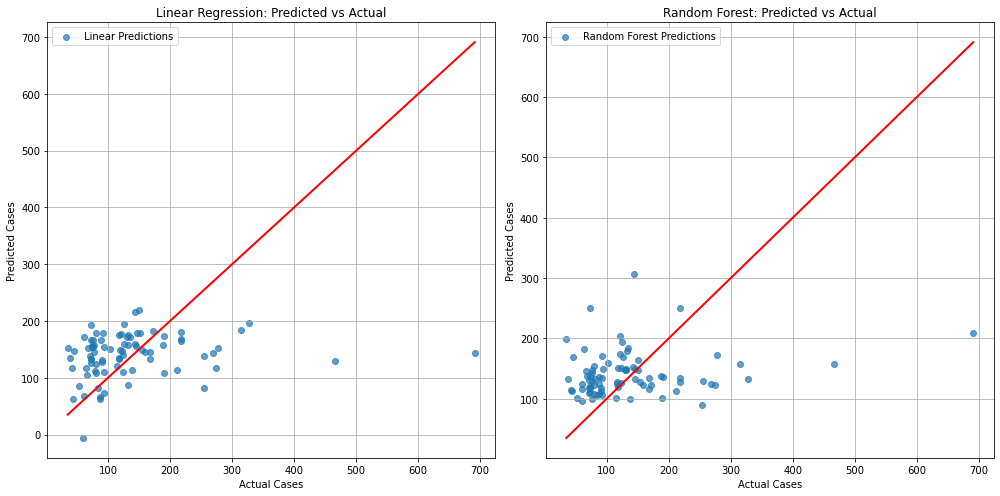

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Select Features and Target
features = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_total'

# Drop rows with missing values in the selected features
analysis_data = analysis_data.dropna(subset=features + [target])

X = analysis_data[features]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train and Evaluate Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train and Evaluate Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# Retrieve and display coefficients from Linear Regression
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lin_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
     Feature  Coefficient
0       tavg    51.145729
5  tavg_lag1    10.203969
7  prcp_lag1    -1.076979
6  tavg_lag2    -1.681894
8  prcp_lag2    -1.888617
3       prcp    -2.885183
4       wspd    -5.700127
1       tmin   -16.332949
2       tmax   -47.016350


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Feature          VIF
0       tavg  7955.072656
1       tmin  3099.910623
2       tmax  3038.603595
3       prcp     2.403921
4       wspd     9.220150
5  tavg_lag1  2844.548353
6  tavg_lag2  2145.152345
7  prcp_lag1     2.396972
8  prcp_lag2     2.222087


Linear Regression Results:
Mean Absolute Error (MAE): 64.69
Root Mean Squared Error (RMSE): 97.74
R² Score: -0.02

Random Forest Regression Results:
Mean Absolute Error (MAE): 67.55
Root Mean Squared Error (RMSE): 97.32
R² Score: -0.01


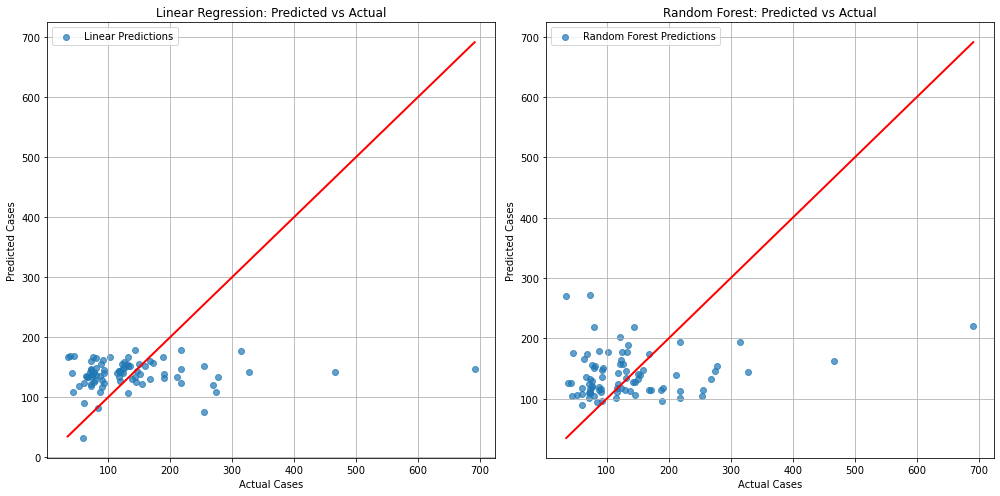

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Updated Feature Set
updated_features = ['tavg', 'prcp', 'wspd', 'tavg_lag1', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_total'

# Drop rows with missing values in the selected features
analysis_data = analysis_data.dropna(subset=updated_features + [target])

X = analysis_data[updated_features]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Linear Regression Results:
Mean Absolute Error (MAE): 63.37
Root Mean Squared Error (RMSE): 96.51
R² Score: 0.01

Random Forest Regression Results:
Mean Absolute Error (MAE): 80.43
Root Mean Squared Error (RMSE): 109.44
R² Score: -0.28


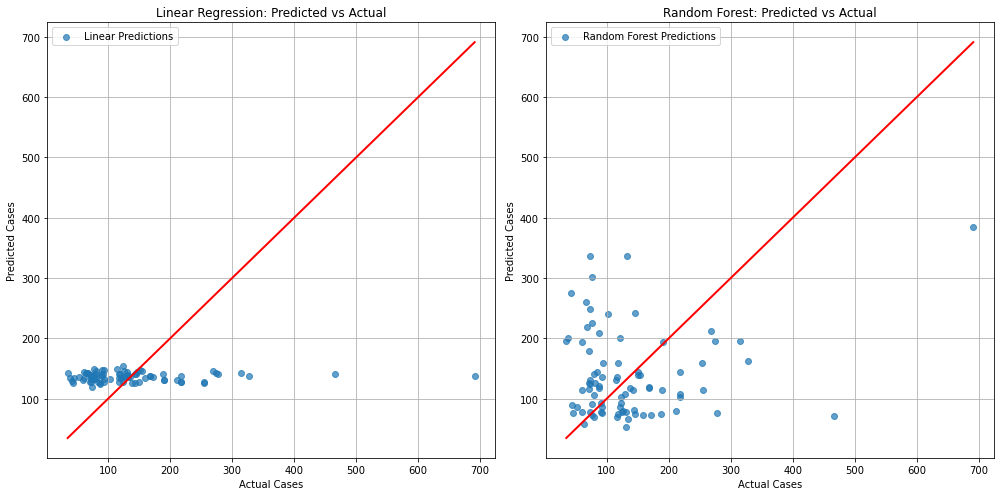

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Use Only Average Temperature as the Feature
single_feature = ['tavg']
target = 'dengue_total'

# Drop rows with missing values in the selected feature and target
analysis_data = analysis_data.dropna(subset=single_feature + [target])

X = analysis_data[single_feature]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Linear Regression Results:
Mean Absolute Error (MAE): 64.74
Root Mean Squared Error (RMSE): 97.50
R² Score: -0.01

Random Forest Regression Results:
Mean Absolute Error (MAE): 87.13
Root Mean Squared Error (RMSE): 126.10
R² Score: -0.70


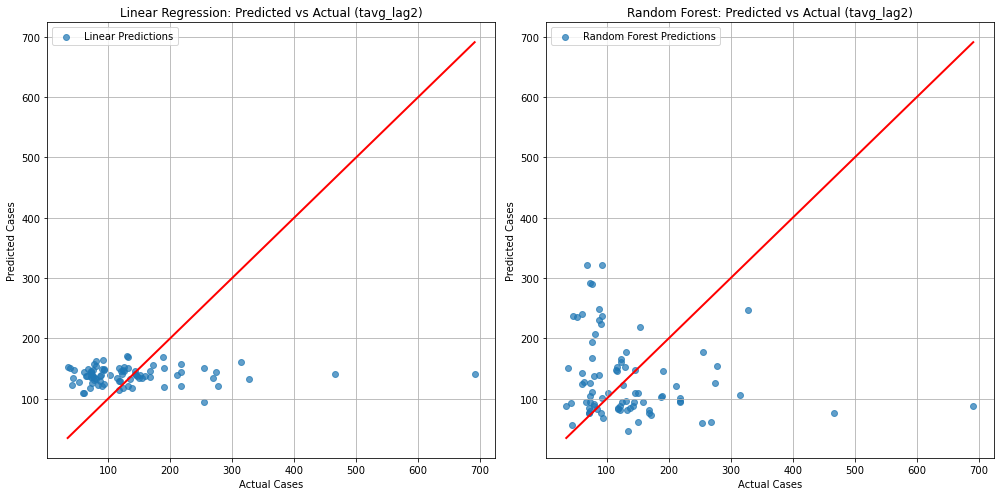

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Use Only tavg_lag2 as the Feature
single_feature = ['tavg_lag2']
target = 'dengue_total'

# Drop rows with missing values in the selected feature and target
analysis_data = analysis_data.dropna(subset=single_feature + [target])

X = analysis_data[single_feature]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual (tavg_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual (tavg_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
# Using Precipitation (prcp) as the single feature
single_feature = ['prcp']
target = 'dengue_total'

# Drop rows with missing values in the selected feature and target
analysis_data = analysis_data.dropna(subset=single_feature + [target])

X = analysis_data[single_feature]
y = analysis_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results (prcp):")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results (prcp):")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

Linear Regression Results (prcp):
Mean Absolute Error (MAE): 63.62
Root Mean Squared Error (RMSE): 96.71
R² Score: 0.00

Random Forest Regression Results (prcp):
Mean Absolute Error (MAE): 71.41
Root Mean Squared Error (RMSE): 104.95
R² Score: -0.18


Linear Regression Results (prcp_lag2):
Mean Absolute Error (MAE): 63.39
Root Mean Squared Error (RMSE): 96.82
R² Score: -0.00

Random Forest Regression Results (prcp_lag2):
Mean Absolute Error (MAE): 80.63
Root Mean Squared Error (RMSE): 120.20
R² Score: -0.54


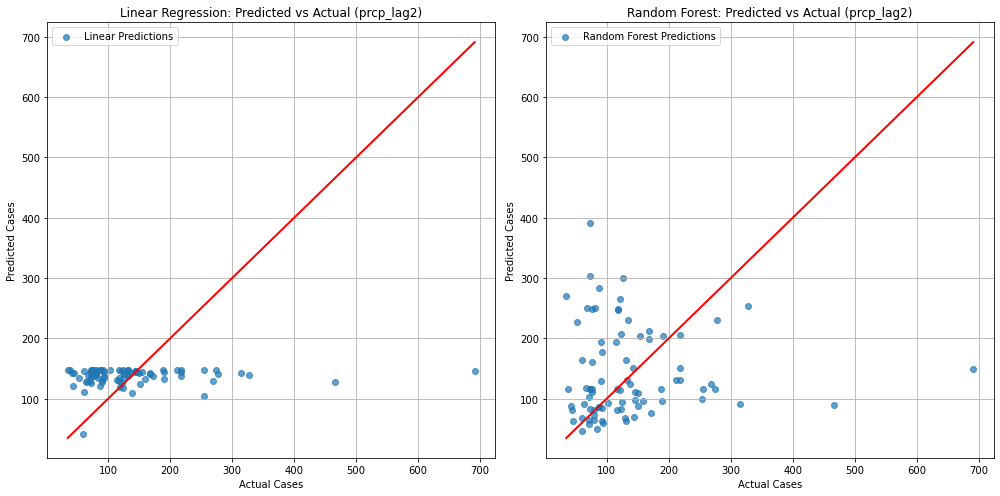

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Use Only prcp_lag2 as the Feature
single_feature = ['prcp_lag2']
target = 'dengue_total'

# Drop rows with missing values in the selected feature and target
analysis_data = analysis_data.dropna(subset=single_feature + [target])

X = analysis_data[single_feature]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results (prcp_lag2):")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results (prcp_lag2):")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual (prcp_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual (prcp_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Linear Regression Results (prcp_lag2 & tavg_lag2):
Mean Absolute Error (MAE): 63.93
Root Mean Squared Error (RMSE): 97.33
R² Score: -0.01

Random Forest Regression Results (prcp_lag2 & tavg_lag2):
Mean Absolute Error (MAE): 84.42
Root Mean Squared Error (RMSE): 121.22
R² Score: -0.57


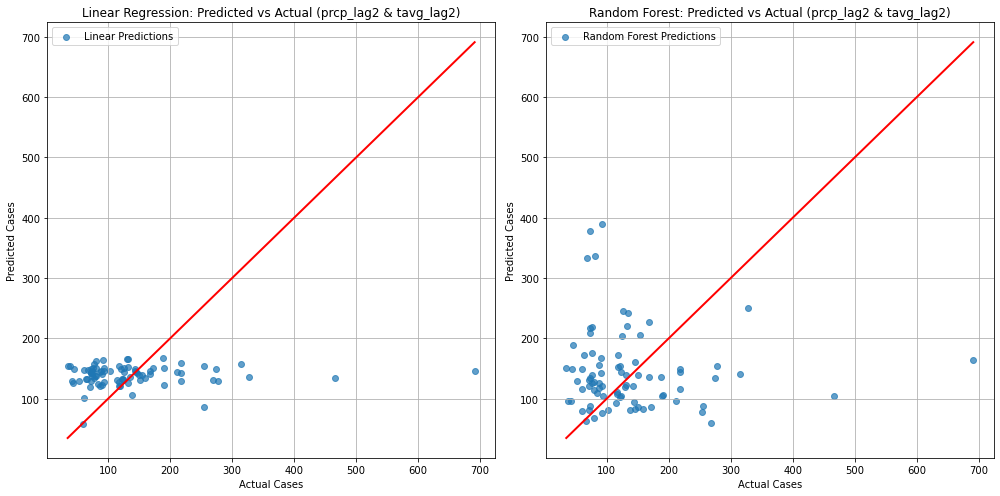

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Use Lagged Precipitation and Temperature as Features
selected_features = ['prcp_lag2', 'tavg_lag2']
target = 'dengue_total'

# Drop rows with missing values in the selected features and target
analysis_data = analysis_data.dropna(subset=selected_features + [target])

X = analysis_data[selected_features]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results (prcp_lag2 & tavg_lag2):")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results (prcp_lag2 & tavg_lag2):")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual (prcp_lag2 & tavg_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual (prcp_lag2 & tavg_lag2)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# Create lagged columns for 3 weeks if not already present
analysis_data['prcp_lag3'] = analysis_data['prcp'].shift(3)
analysis_data['tavg_lag3'] = analysis_data['tavg'].shift(3)

# Create cumulative features for precipitation and temperature over 3 weeks
analysis_data['prcp_rolling_3weeks'] = (
    analysis_data['prcp_lag1'] + analysis_data['prcp_lag2'] + analysis_data['prcp_lag3']
)
analysis_data['tavg_rolling_3weeks'] = (
    analysis_data['tavg_lag1'] + analysis_data['tavg_lag2'] + analysis_data['tavg_lag3']
)

# Drop rows with missing values in the cumulative features
analysis_data = analysis_data.dropna(subset=['prcp_rolling_3weeks', 'tavg_rolling_3weeks', 'dengue_total'])


Linear Regression Results (Cumulative Features):
Mean Absolute Error (MAE): 80.06
Root Mean Squared Error (RMSE): 107.82
R² Score: -0.01

Random Forest Regression Results (Cumulative Features):
Mean Absolute Error (MAE): 82.05
Root Mean Squared Error (RMSE): 112.95
R² Score: -0.11


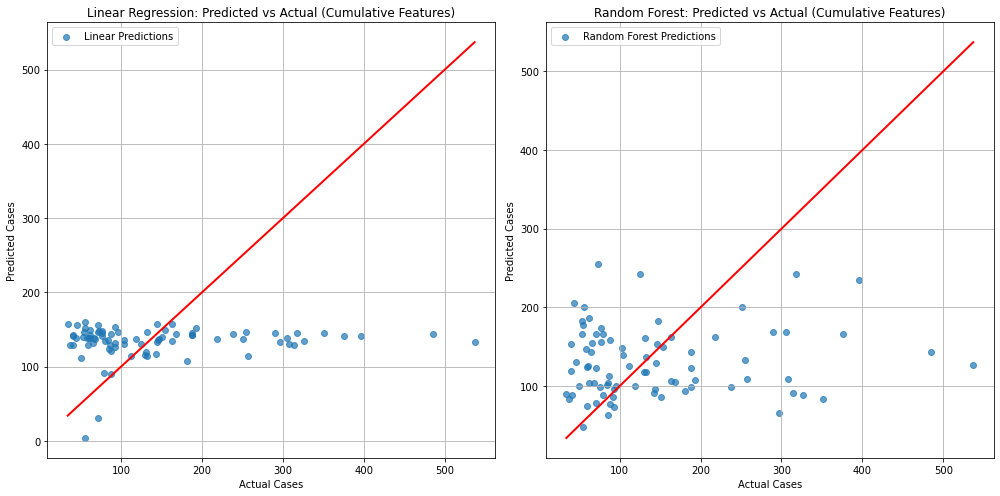

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Use Cumulative Features
selected_features = ['prcp_rolling_3weeks', 'tavg_rolling_3weeks']
target = 'dengue_total'

X = analysis_data[selected_features]
y = analysis_data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
lin_y_pred = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_y_pred))
lin_r2 = r2_score(y_test, lin_y_pred)

print("Linear Regression Results (Cumulative Features):")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results (Cumulative Features):")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# Step 5: Compare Predictions Visually
plt.figure(figsize=(14, 7))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_y_pred, alpha=0.7, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual (Cumulative Features)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Predicted vs Actual (Cumulative Features)')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        41
           1       0.54      0.54      0.54        41

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82

Confusion Matrix:
 [[22 19]
 [19 22]]
ROC-AUC Score: 0.5609756097560975

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60        41
           1       0.60      0.59      0.59        41

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.60        82
weighted avg       0.60      0.60      0.60        82

Confusion Matrix:
 [[25 16]
 [17 24]]
ROC-AUC Score: 0.6020226055919096


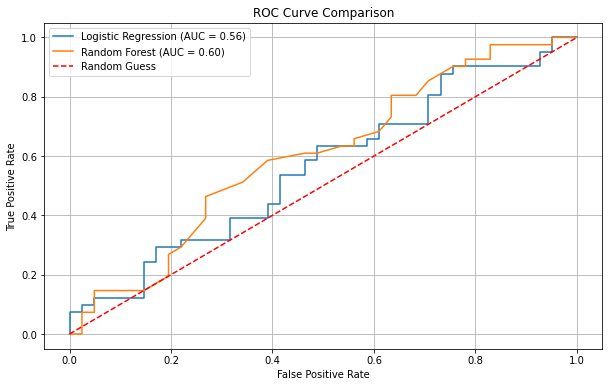

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Define High/Low Dengue Risk
threshold = analysis_data['dengue_total'].median()
analysis_data['dengue_risk'] = np.where(analysis_data['dengue_total'] > threshold, 1, 0)

# Step 2: Select Features and Target
features = ['tavg', 'prcp', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_risk'

# Drop rows with missing values in the selected features
analysis_data = analysis_data.dropna(subset=features + [target])

X = analysis_data[features]
y = analysis_data[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=500)
log_model.fit(X_train, y_train)

# Predictions and evaluation for Logistic Regression
log_y_pred = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
rf_y_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Step 6: Visualize ROC Curve for Both Models
from sklearn.metrics import roc_curve

log_fpr, log_tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [08:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56        41
           1       0.54      0.49      0.51        41

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82

Confusion Matrix:
 [[24 17]
 [21 20]]
ROC-AUC Score: 0.5163593099345628


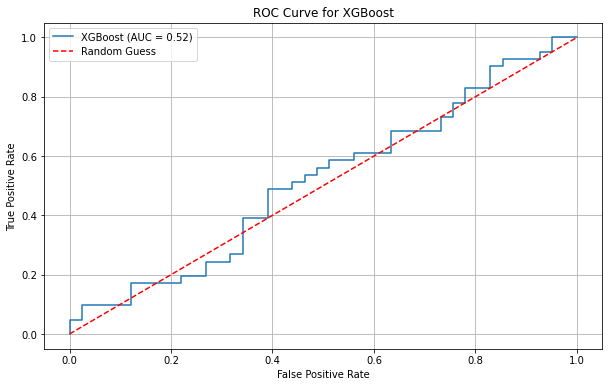

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Use the same features and target
features = ['tavg', 'prcp', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_risk'

X = analysis_data[features]
y = analysis_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_y_prob))

# Step 4: Visualize the ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)

plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, xgb_y_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [08:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56        41
           1       0.54      0.49      0.51        41

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82

Confusion Matrix:
 [[24 17]
 [21 20]]
ROC-AUC Score: 0.5163593099345628


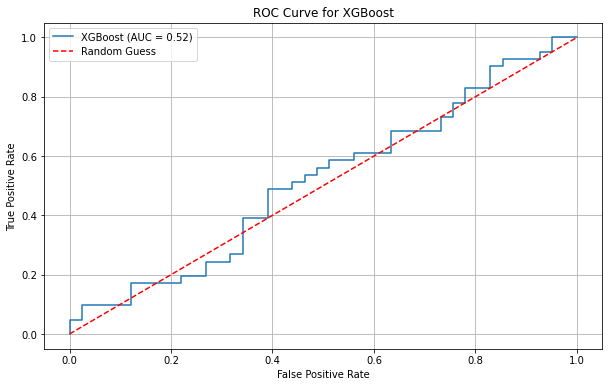

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Use the same features and target
features = ['tavg', 'prcp', 'tavg_lag1', 'tavg_lag2', 'prcp_lag1', 'prcp_lag2']
target = 'dengue_risk'

X = analysis_data[features]
y = analysis_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_y_prob))

# Step 4: Visualize the ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)

plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, xgb_y_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:

# Assuming 'year' and 'week_number' are in your dataset
analysis_data['date'] = pd.to_datetime(analysis_data['Year'].astype(str) + '-' + analysis_data['week_number'].astype(str) + '-1', format='%Y-%W-%w')

# Extract the month from the computed date
analysis_data['month'] = analysis_data['date'].dt.month


# Step 1: Extract Month
analysis_data['month'] = pd.to_datetime(analysis_data['date']).dt.month

# Step 2: Create Interaction Terms
analysis_data['tavg_prcp_interaction'] = analysis_data['tavg'] * analysis_data['prcp']

# Step 3: Add Rolling Features (if lag columns are available)
analysis_data['prcp_rolling_2weeks'] = analysis_data['prcp_lag1'] + analysis_data['prcp_lag2']
analysis_data['tavg_rolling_2weeks'] = analysis_data['tavg_lag1'] + analysis_data['tavg_lag2']

# Drop rows with missing values in new features
analysis_data = analysis_data.dropna(subset=['tavg', 'prcp', 'month', 'tavg_prcp_interaction', 
                                             'prcp_rolling_2weeks', 'tavg_rolling_2weeks', 'dengue_risk'])

In [36]:
analysis_data.head()

,dengue_total,Year,week_number,tavg,tmin,tmax,prcp,wdir,wspd,pres,...,dengue_risk,prcp_lag3,tavg_lag3,prcp_rolling_3weeks,tavg_rolling_3weeks,date,month,tavg_prcp_interaction,prcp_rolling_2weeks,tavg_rolling_2weeks
5,88,2003,6,26.428571,23.600000,29.914286,4.514286,235.833333,10.942857,NaN,...,0,17.266667,26.883333,51.052381,80.469048,2003-02-10,2,119.306122,33.785714,53.585714
6,88,2003,7,27.342857,25.314286,30.685714,6.171429,19.800000,9.357143,NaN,...,0,1.828571,27.214286,38.300000,80.014286,2003-02-17,2,168.744490,36.471429,52.800000
7,99,2003,8,27.257143,23.950000,31.057143,12.228571,15.666667,9.033333,NaN,...,0,31.957143,26.371429,42.642857,80.142857,2003-02-24,2,333.315918,10.685714,53.771429
8,60,2003,9,27.871429,24.771429,32.228571,3.271429,9.800000,9.171429,NaN,...,0,4.514286,26.428571,22.914286,81.028571,2003-03-03,3,91.179388,18.400000,54.600000
9,92,2003,10,27.971429,24.414286,32.528571,11.185714,NaN,5.471429,NaN,...,0,6.171429,27.342857,21.671429,82.471429,2003-03-10,3,312.880408,15.500000,55.128571


In [37]:
# Selected Features
features = ['tavg', 'prcp', 'month', 'tavg_prcp_interaction', 'prcp_rolling_2weeks', 'tavg_rolling_2weeks']
target = 'dengue_risk'

X = analysis_data[features]
y = analysis_data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=500)
log_model.fit(X_train, y_train)

# Predictions
log_y_pred = log_model.predict(X_test)
log_y_prob = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_y_prob))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.59        41
           1       0.61      0.73      0.67        41

    accuracy                           0.63        82
   macro avg       0.64      0.63      0.63        82
weighted avg       0.64      0.63      0.63        82

Confusion Matrix:
 [[22 19]
 [11 30]]
ROC-AUC Score: 0.6252230814991077


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_y_prob))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        41
           1       0.70      0.73      0.71        41

    accuracy                           0.71        82
   macro avg       0.71      0.71      0.71        82
weighted avg       0.71      0.71      0.71        82

Confusion Matrix:
 [[28 13]
 [11 30]]
ROC-AUC Score: 0.7772159428911363


In [40]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_y_prob))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.71      0.66      0.68        41

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.69        82
weighted avg       0.70      0.70      0.69        82

Confusion Matrix:
 [[30 11]
 [14 27]]
ROC-AUC Score: 0.7977394408090424


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


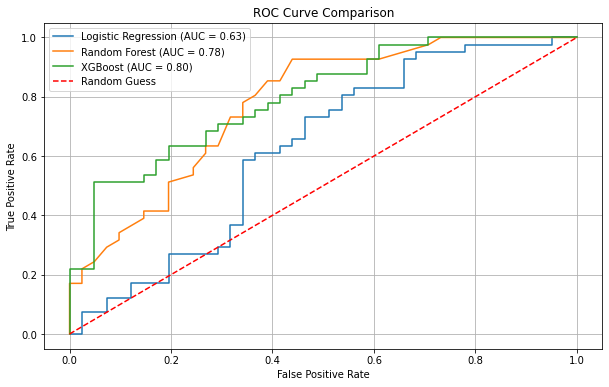

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_y_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, log_y_prob)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_y_prob)))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, xgb_y_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the base model
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best ROC-AUC Score: 0.6271757983879196


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the base model
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best ROC-AUC Score: 0.6214610754004694


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:45:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [44]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    model = XGBClassifier(**param, random_state=42, use_label_encoder=False, eval_metric='logloss')
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    return scores.mean()

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters and score
print("Best Parameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)

ModuleNotFoundError: No module named 'optuna'

In [45]:
!pip install optuna

     |████████████████████████████████| 364 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 78.0 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 22.3 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3


In [46]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    model = XGBClassifier(**param, random_state=42, use_label_encoder=False, eval_metric='logloss')
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    return scores.mean()

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters and score
print("Best Parameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)

[I 2024-11-26 09:46:53,012] A new study created in memory with name: no-name-c1877f6e-5be0-4816-acea-68e9f07be235
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-26 09:46:53,345] Trial 0 finished with value: 0.5972533414957657 and parameters: {'n_estimators

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-26 09:46:55,369] Trial 7 finished with value: 0.5788613406795223 and parameters: {'n_estimators': 54, 'learning_rate': 0.13960765077574966, 'max_depth': 4, 'subsample': 0.7616756903417021, 'colsample_bytree': 0.7843438401364381, 'gamma': 0.006800544760017812, 'min_child_weight': 10}. Best is trial 3 with value: 0.6082848688909296.
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:55] WARNING: /Users/runner/work

[I 2024-11-26 09:46:58,027] Trial 14 finished with value: 0.6049107233955718 and parameters: {'n_estimators': 72, 'learning_rate': 0.19985762764279494, 'max_depth': 8, 'subsample': 0.9914200067958558, 'colsample_bytree': 0.9364800464344734, 'gamma': 0.046155418793211514, 'min_child_weight': 8}. Best is trial 13 with value: 0.6222314049586777.
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:46:58] WARNING: /Users/runner/wor

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-26 09:47:01,037] Trial 22 finished with value: 0.6093796551372309 and parameters: {'n_estimators': 169, 'learning_rate': 0.15852482914069976, 'max_depth': 6, 'subsample': 0.8873364502476823, 'colsample_bytree'

[I 2024-11-26 09:47:03,711] Trial 29 finished with value: 0.5837577798183858 and parameters: {'n_estimators': 149, 'learning_rate': 0.1225406389779232, 'max_depth': 5, 'subsample': 0.8200867958265219, 'colsample_bytree': 0.8456054677837653, 'gamma': 0.2380903806204988, 'min_child_weight': 9}. Best is trial 21 with value: 0.629252117130905.
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:03] WARNING: /Users/runner/work/x

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-26 09:47:07,240] Trial 37 finished with value: 0.597683909805122 and parameters: {'n_estimators': 189, 'learning_rate': 0.16340309092248018, 'max_depth': 4, 'subsample': 0.8926413097073533, 'colsample_bytree':

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-26 09:47:10,134] Trial 44 finished with value: 0.6198969492908887 and parameters: {'n_estimators': 191, 'learning_rate': 0.15275981074473638, 'max_depth': 5, 'subsample': 0.9325390583696087, 'colsample_bytree': 0.8258098595712665, 'gamma': 0.11633697397071718, 'min_child_weight': 7}. Best is trial 21 with value: 0.629252117130905.
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [09:47:10] WARNING: /Users/runner/work

Best Parameters: {'n_estimators': 172, 'learning_rate': 0.18144513698857137, 'max_depth': 6, 'subsample': 0.8876108762583151, 'colsample_bytree': 0.8160274488456637, 'gamma': 0.21186102727098702, 'min_child_weight': 7}
Best ROC-AUC Score: 0.629252117130905
